# Alumna: Hernández Sandoval Kelly Pamela

## Ejercicio 5:

La ecuación de onda está dada por la ecuación diferencial



$$\frac{\partial^2 u}{\partial t^2}(x,t)-\alpha^2 \frac{\partial^2 u}{\partial x^2}(x,t)= 0,   \\  en \\0<x<L, t>0$$

donde $\alpha$ es una constante que depende de las condiciones físicas del problema.

Condiciones iniciales y de frontera:

$$u(0,t) = u(l,t) = 0$$

para $t>0$

$$u(x,0) = f(x)$$
y

$$\frac{\partial u}{\partial t}(x,0)=g(x)$$

para $0 \le x \le L$

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
L = 1 # Longitud del dominio
N = 20 # Numero de incognitas internas
Tmax = 1.0 # Tiempo maximo de simulacion
ht = 0.05 # Paso de tiempo
alpha = 2 # Dato fisico
h = L / (N +1) # Tamanio de la malla espacial
Nt = int (Tmax/ht) # Numero total de pasos
lam = alpha * ht / h # Parametro lambda
Tmax = Nt * ht # Tiempo total de simulacion

t=np.linspace(0,Tmax,Nt)
x = np.linspace(0,L,N +2) # Coordenadas de la malla
#dominio para la graficar solucion analitica en el solver
tsa=np.linspace(0,(Tmax/2),(N+2))


### Para que sea estable
Debe cumplir con el Criterio de Courant

$$\lambda = \frac{\alpha h_t}{h} \le1$$

In [15]:
#condición de estabilidad
#Criterio de Courant

if lam <=1:
    print('Es estable')
    
else:
    print('No es estable, por lo que se cambiará ht para volver la solución numérica estable')
    #se define lambda=1
    lam = 1
    ht=(h *1)/alpha
    Nt=int(Tmax/ht)
    print('Asumiendo que lambda es:', lam)
    print('El nuevo ht será:', ht)
    print('y Nt:',Nt)

No es estable, por lo que se cambiará ht para volver la solución numérica estable
Asumiendo que lambda es: 1
El nuevo ht será: 0.023809523809523808
y Nt: 42


In [16]:
def f(x):
    """
    Se establece f(x), la cual busca aproximar la solución y(t)
    Condición inicial
    Parameters
    ----------
    x : dominio

    Returns
    -------
    devuelve la función f(x)

    """
    return np.sin(np.pi * x)

def g(x):
    """
    Velocidad inicial
    Parameters
    ----------
    x : dominio
    -------
    int

    """
    return 0
def solExacta(x, t):
    """
    Función que obtiene la solución exacta0/analítica

    Parameters
    ----------
    x : posición
    t : tiempo

    Returns
    -------

    """
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)
def calcError(sol_n , sol_e ):
    """
    Función que calcula el error

    Parameters
    ----------
    sol_n : solución numérica
    sol_e : solución exacta

    Returns
    -------

    """
    return np.abs (sol_n - sol_e )
def condicionesIniciales (l, ht , u, x, op =1):
    """"
    Parameters
    ----------
    l : lambda
    ht : tamaño del paso de tiempo
    u : solución.
    x : TYPE
        DESCRIPTION.
    op :orden 

    Returns
    -------
    w : aproximacón

    """
    N = len (u)
    w = np. zeros (N)
    for i in range (1,N -1):
        if op == 1:
            w[i] = u[i] + ht * g(x[i])
        else :
            w[i] = (1 - l **2) * u[i] + 0.5 * l **2 * (u[i +1] + u[i -1]) + ht * g(x[i])
    return w

In [17]:
def solver(u, w, N, x, Nt , l,tsa):
    """
    Funcion que devuelve la solución en los nodos en el tiempo n+1
    Parameters
    ----------
    u : solución que se guarda
    w : nueva solución para el tiempo n
    N : Número de incógnicas
    x : dominio
    Nt : Pasos en el tiempo.
    l : lambda
        DESCRIPTION.

    Returns
    -------
    s : solución en los nodos

    """
    s = np.zeros(N+2)
    for n in range (1, N+1):
        for i in range (1,N +1):
            s[i] = 2 * (1 - l **2) * w[i] + l**2 * (w[i +1] + w[i -1]) - u[i]
        SolExac=solExacta(x,tsa[n])
        u = w.copy()
        w = s.copy()
        
        if n==1:
            plt.plot(x,SolExac,'grey',label='Exacta')
            plt.plot(x,s,'ko',label='Numérica')
            plt.legend()
        else:
            plt.plot(x,SolExac,'grey')
            plt.plot(x,s,'ko')
            plt.legend()
    return s

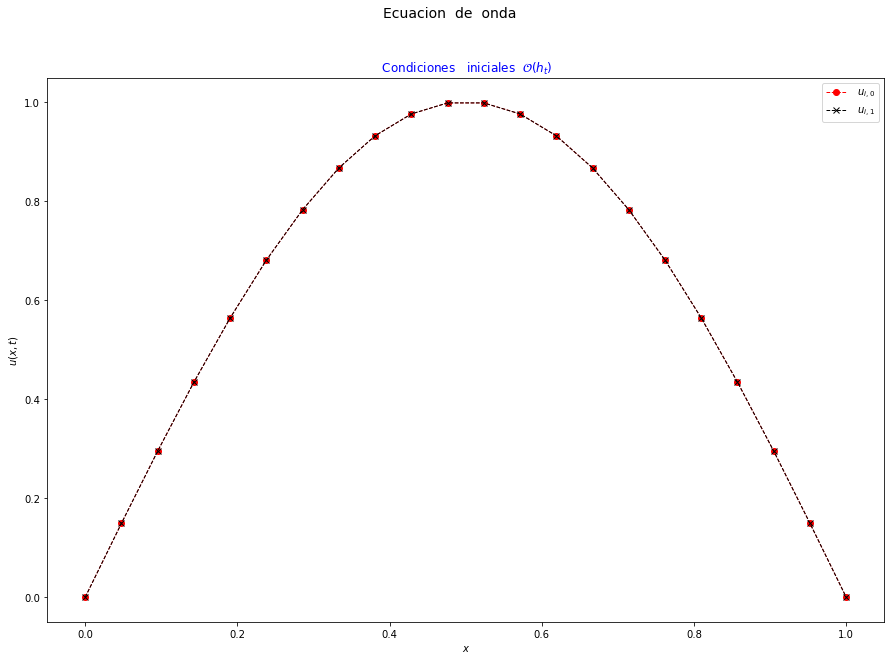

In [18]:
u = f(x) # Condicion inicial, 
w = condicionesIniciales(lam, ht , u, x, op =1) # Euler :op = 2

#gráfica
plt.figure(figsize=(15,10))
plt.suptitle('Ecuacion  de  onda ', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = " $u_ {i ,0} $")
plt.plot(x, w,'kx--', lw = 1, label = " $u_ {i ,1} $")
plt.title(' Condiciones   iniciales  $\mathcal{O}( h_t )$', color ='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$ ')
plt.legend()
plt.savefig('condicion_O3.pdf')

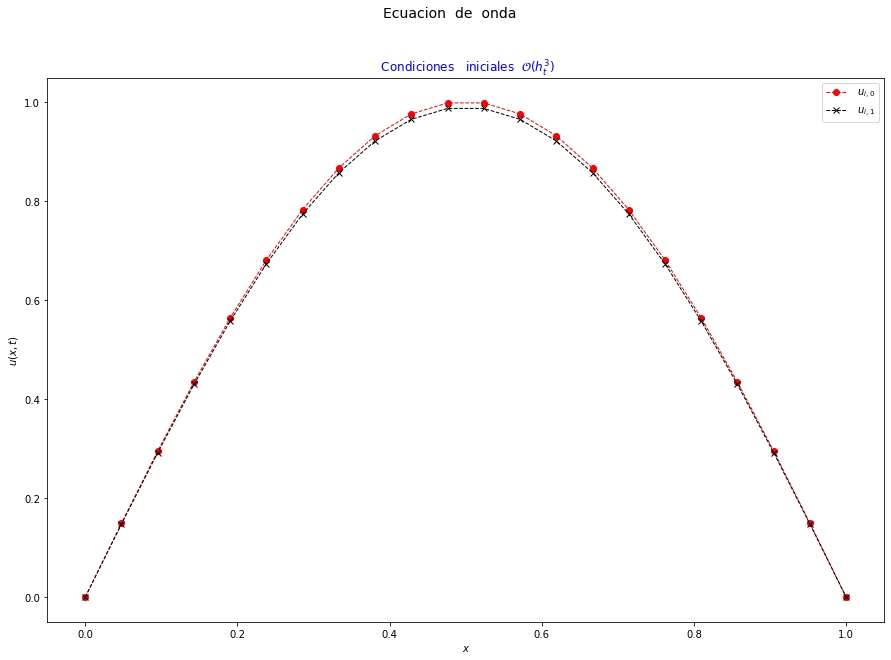

In [21]:
#x = np.linspace(0,L,N +2) # Coordenadas de la malla
u = f(x) # Condicion inicial
w = condicionesIniciales(lam, ht , u, x, op =2) # Euler :op = 2
#gráfica
plt.figure(figsize=(15,10))
plt.suptitle('Ecuacion  de  onda ', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = " $u_ {i ,0} $")
plt.plot(x, w,'kx--', lw = 1, label = " $u_ {i ,1} $")
plt.title(' Condiciones   iniciales  $\mathcal{O}( h_t^3 )$', color ='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$ ')
plt.legend()
plt.savefig('condicion_O3.pdf')

22
22


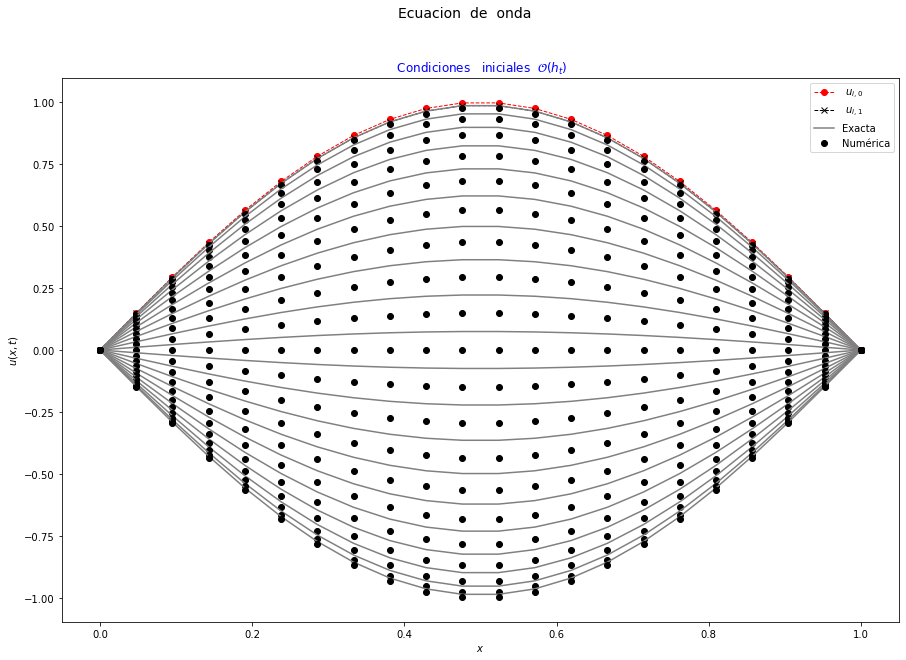

In [20]:
print(len(x))
print(len(tsa))
plt.figure(figsize=(15,10))
plt.suptitle('Ecuacion  de  onda ', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = " $u_ {i ,0} $")
plt.plot(x, w,'kx--', lw = 1, label = " $u_ {i ,1} $")

plt.title(' Condiciones   iniciales  $\mathcal{O}( h_t )$', color ='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$ ')
w = condicionesIniciales(lam, ht , u, x, op = 1) # Euler :op = 1
s = solver(u, w, N, x, Nt , lam,tsa )
plt.savefig('condicion_O1.pdf')
plt.legend()
plt.show()




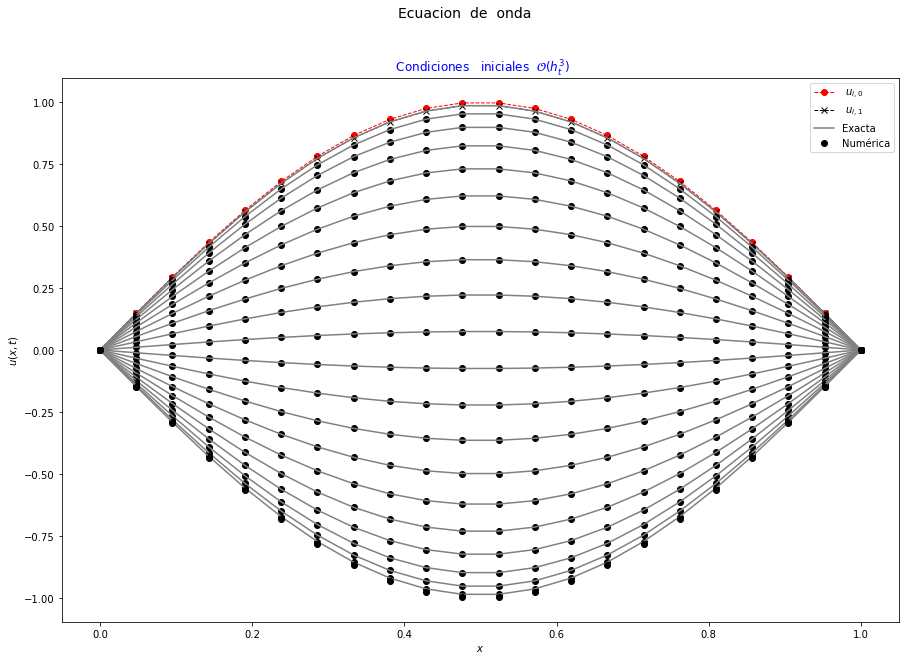

In [22]:

plt.figure(figsize=(15,10))
plt.suptitle('Ecuacion  de  onda ', fontsize =14)
plt.plot(x, u,'ro--', lw = 1, label = " $u_ {i ,0} $")
plt.plot(x, w,'kx--', lw = 1, label = " $u_ {i ,1} $")
plt.title(' Condiciones   iniciales  $\mathcal{O}( h_t^3 )$', color ='blue', fontsize =12)
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$ ')
plt.legend()

plt.savefig('condicion_O3.pdf')
w = condicionesIniciales (lam, ht , u, x, op = 2) # Euler :op = 1
s = solver (u, w, N, x, Nt , lam,tsa)